In [103]:
from datasets import load_dataset

from tqdm.notebook import tqdm

import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

import collections
import random

In [77]:
!pip install -U datasets

In [78]:
ds = load_dataset('ml1996/webqsp')

In [79]:
def describe_graph(data, topk=10):
    for k in ['question', 'answer']:
        print(k, '-', data[k])
    print()

    G = nx.DiGraph()

    for source, relation, target in data['graph']:
        G.add_edge(source, target, relation=relation)

    metrics = {}
    metrics['num_nodes'] = G.number_of_nodes()
    metrics['num_edges'] = G.number_of_edges()
    metrics['density'] = nx.density(G)

    degrees = np.array([d for _, d in G.in_degree()])

    plt.figure(figsize=(12, 6))
    plt.hist(degrees, bins=100, log=True, color='salmon', edgecolor='darkred', alpha=0.8)

    plt.title('Распределение степеней вершин', fontsize=14)
    plt.xlabel('Степень вершины', fontsize=12)
    plt.ylabel('log(Частота)', fontsize=12)
    plt.grid(axis='y', linestyle=':')

    plt.show()
    print()

    for k, v in metrics.items():
        print(k, v)
    print()
    print(f'Top-{topk} Hubs:')
    for key, deg in sorted(list(G.in_degree()), key=lambda x: -x[1])[:topk]:
        print(key, deg)

question - what is the name of justin bieber brother
answer - ['Jaxon Bieber']



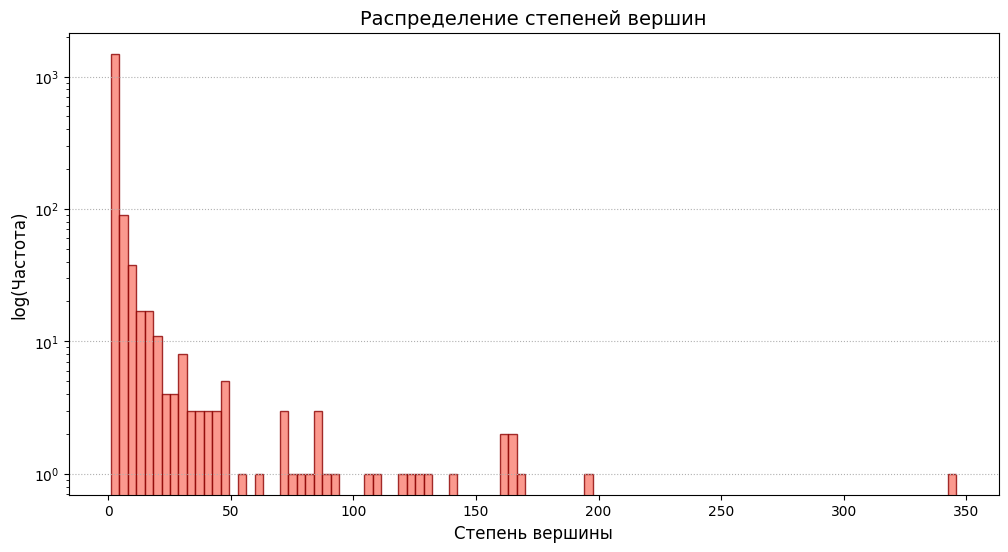


num_nodes 1720
num_edges 8283
density 0.0028014529810463087

Top-10 Hubs:
Justin Bieber 346
United States of America 195
Date of birth 167
Gender 166
Pop music 166
Country of nationality 161
Place of birth 160
Male 139
Actor 130
Contemporary R&B 126


In [80]:
describe_graph(ds['train'][0])

question - what character did natalie portman play in star wars
answer - ['Padmé Amidala']



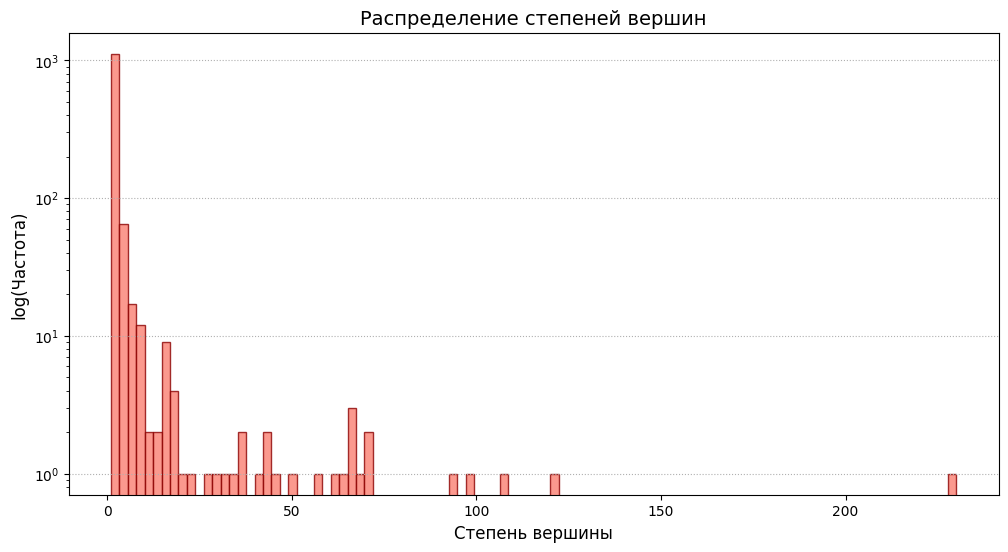


num_nodes 1253
num_edges 3934
density 0.002507719492387599

Top-10 Hubs:
Natalie Portman 230
United States of America 122
No Strings Attached 108
Hesher 99
Male 94
Place of birth 71
Film Producer 70
Date of birth 69
Love and Other Impossible Pursuits 67
Gender 67


In [81]:
describe_graph(ds['train'][1])

question - what country is the grand bahama island in
answer - ['Bahamas']



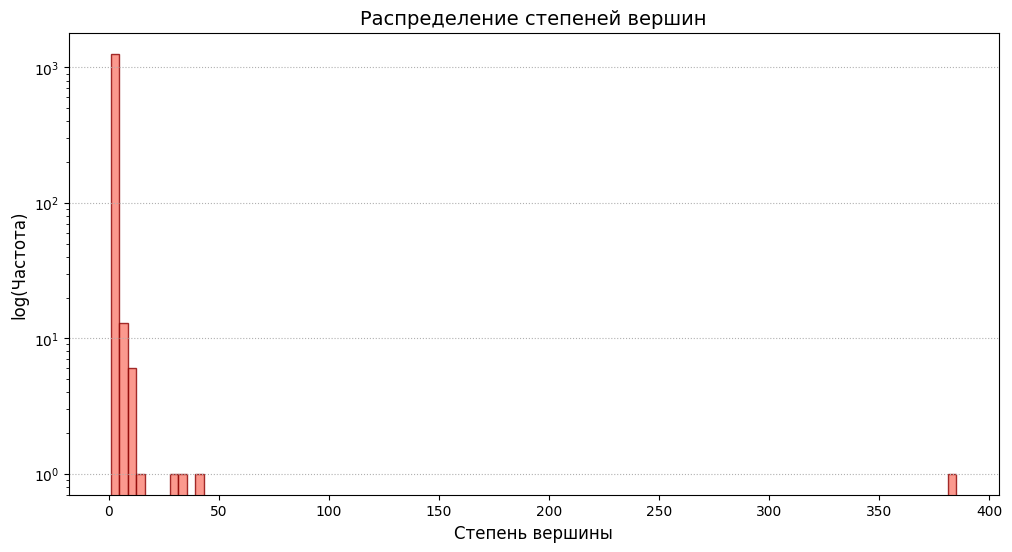


num_nodes 1286
num_edges 2012
density 0.0012175418000496215

Top-10 Hubs:
Bahamas 385
Male 43
Eastern Time Zone 34
Location 30
Airport 15
Entertainment Weekly annotation index 12
Grand Bahama 11
Athlete 11
Map of Bahamas 11
Geographical Feature 9


In [82]:
describe_graph(ds['train'][2])

In [89]:
ds['train'][0].keys()

dict_keys(['id', 'question', 'answer', 'q_entity', 'a_entity', 'graph', 'choices'])

In [120]:
G = nx.DiGraph()

for source, relation, target in ds['train'][0]['graph']:
    G.add_edge(source, target, relation=relation)

source = random.choice(list(G.nodes()))
target = ds['train'][0]['answer'][0]

In [121]:
sp = dict(nx.all_pairs_shortest_path(G))

In [144]:
path = sp['P!nk']['Jaxon Bieber']
for i in range(1, len(path)):
    print(f"[{path[i-1]}] > {G.edges()[(path[i-1], path[i])]['relation']} > [{path[i]}]")

[P!nk] > broadcast.artist.content > [Big R Radio - The Hawk]
[Big R Radio - The Hawk] > broadcast.content.artist > [Justin Bieber]
[Justin Bieber] > people.person.parents > [Jeremy Bieber]
[Jeremy Bieber] > people.person.children > [Jaxon Bieber]
